<center> <h1> Costa Rican Poverty Predction </h1> </center>
<center> <h2> by: Jason Lin, Jason Lingle, and Jonathan Marin </h2> </center>
<center> <h2> 9/16/2018 </h2> </center>


# Preprocessing for Assignment

In [2]:
import pandas as pd 
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


train = pd.DataFrame(pd.read_csv("train.csv"))
test = pd.DataFrame(pd.read_csv("test.csv"))





In [3]:

#Find the Nulls
null_columns=train.columns[train.isnull().any()]

train[null_columns].isnull().sum()

v2a1       6860
v18q1      7342
rez_esc    7928
dtype: int64

In [4]:
# Update and Check to see we updated

# There are 2156 null values for v2a1 (monthly mortgage payment).  After accounting for those that don't 
#rent, we are left with 300 values that have nulls.  We can try to create a model 

train.loc[(train.tipovivi1 == 1),'v2a1'] = 0
test.loc[(test.tipovivi1 == 1),'v2a1'] = 0


train.loc[np.isnan(train["v18q1"]), 'v18q1'] = 0
test.loc[np.isnan(test["v18q1"]), 'v18q1'] = 0

train.loc[np.isnan(train["v18q1"]), 'v18q1'] = 0
test.loc[np.isnan(test["v18q1"]), 'v18q1'] = 0


train.loc[(train.dependency == "yes"),'dependency'] = 1
train.loc[(train.dependency == "no"),'dependency'] = 0

test.loc[(test.dependency == "yes"),'dependency'] = 1
test.loc[(test.dependency == "no"),'dependency'] = 0


train.loc[(train.edjefe == "yes"),'edjefe'] = 1
train.loc[(train.edjefe == "no"),'edjefe'] = 0

test.loc[(test.edjefe == "yes"),'edjefe'] = 1
test.loc[(test.edjefe == "no"),'edjefe'] = 0



train.loc[(train.edjefa == "yes"),'edjefa'] = 1
train.loc[(train.edjefa == "no"),'edjefa'] = 0

test.loc[(test.edjefa == "yes"),'edjefa'] = 1
test.loc[(test.edjefa == "no"),'edjefa'] = 0


null_columns=train.columns[train.isnull().any()]

train[null_columns].isnull().sum()


v2a1        949
rez_esc    7928
dtype: int64

In [5]:
#Denormalization

#Create subset dataframes for head of househoold for tain and test
train_head = train[['idhogar', 'parentesco1', 'Id', 'hhsize', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms', 'overcrowding', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'SQBescolari', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned','Target']]

train_head = train_head[train_head['parentesco1'] == 1]

test_head = test[['idhogar', 'parentesco1', 'Id', 'hhsize', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms', 'overcrowding', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'SQBescolari', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned']]

test_head = test_head[test_head['parentesco1'] == 1]

#Start the member level denormalization for train and test
train_member_agg = pd.DataFrame(sqldf("select  "
"idhogar, "
"sum(cast(v18q as int)) 'JM_Sum_of_Tablets', "
"sum(cast(escolari as int)) 'Total Sum Years of Schooling', "
"sum(case when escolari < 5 then 1 else 0 end) as 'JM_People_Educ_LT5', "
"sum(case when escolari < 10 then 1 else 0 end) as 'JM_People_Educ_LT10', "
"sum(case when escolari < 15 then 1 else 0 end) as 'JM_People_Educ_LT15', "
"sum(case when escolari < 20 then 1 else 0 end) as 'JM_People_Educ_LT20', "
"sum(case when escolari < 25 then 1 else 0 end) as 'JM_People_Educ_LT25', "
"sum(case when rez_esc = 1 then 1 else 0 end) as 'JM_1YrBehindSchool', "
"sum(case when rez_esc = 2 then 1 else 0 end) as 'JM_2YrBehindSchool', "
"sum(case when rez_esc = 3 then 1 else 0 end) as 'JM_3YrBehindSchool', "
"sum(case when rez_esc = 4 then 1 else 0 end) as 'JM_4YrBehindSchool', "
"sum(case when rez_esc = 5 then 1 else 0 end) as 'JM_5YrBehindSchool', "
"sum(cast(dis as int)) as 'JM_Sum_of_Disabled', "
"sum(cast(male as int)) as 'JM_Sum_Of_Males', "
"sum(cast(female as int)) as 'JM_Sum_Of_Females', "
"sum(cast(estadocivil1 as int)) as  'JM_estadocivil1', "
"sum(cast(estadocivil2 as int)) as  'JM_estadocivil2', "
"sum(cast(estadocivil3 as int)) as  'JM_estadocivil3', "
"sum(cast(estadocivil4 as int)) as  'JM_estadocivil4', "
"sum(cast(estadocivil5 as int)) as  'JM_estadocivil5', "
"sum(cast(estadocivil6 as int)) as  'JM_estadocivil6', "
"sum(cast(estadocivil7 as int)) as  'JM_estadocivil7', "
"sum(cast(parentesco1 as int)) as  'JM_parentesco1', "
"sum(cast(parentesco2 as int)) as  'JM_parentesco2', "
"sum(cast(parentesco3 as int)) as  'JM_parentesco3', "
"sum(cast(parentesco4 as int)) as  'JM_parentesco4', "
"sum(cast(parentesco5 as int)) as  'JM_parentesco5', "
"sum(cast(parentesco6 as int)) as  'JM_parentesco6', "
"sum(cast(parentesco7 as int)) as  'JM_parentesco7', "
"sum(cast(parentesco8 as int)) as  'JM_parentesco8', "
"sum(cast(parentesco9 as int)) as  'JM_parentesco9', "
"sum(cast(parentesco10 as int)) as  'JM_parentesco10', "
"sum(cast(parentesco11 as int)) as  'JM_parentesco11', "
"sum(cast(parentesco12 as int)) as  'JM_parentesco12', "
"sum(cast(instlevel1 as int)) as  'JM_instlevel1', "
"sum(cast(instlevel2 as int)) as  'JM_instlevel2', "
"sum(cast(instlevel3 as int)) as  'JM_instlevel3', "
"sum(cast(instlevel4 as int)) as  'JM_instlevel4', "
"sum(cast(instlevel5 as int)) as  'JM_instlevel5', "
"sum(cast(instlevel6 as int)) as  'JM_instlevel6', "
"sum(cast(instlevel7 as int)) as  'JM_instlevel7', "
"sum(cast(instlevel8 as int)) as  'JM_instlevel8', "
"sum(cast(instlevel9 as int)) as  'JM_instlevel9', "
"sum(cast(mobilephone as int)) as  'JM_mobilephone'" 
"from train "
"group by idhogar "
))



test_member_agg = pd.DataFrame(sqldf("select  "
"idhogar, "
"sum(cast(v18q as int)) 'JM_Sum_of_Tablets', "
"sum(cast(escolari as int)) 'Total Sum Years of Schooling', "
"sum(case when escolari < 5 then 1 else 0 end) as 'JM_People_Educ_LT5', "
"sum(case when escolari < 10 then 1 else 0 end) as 'JM_People_Educ_LT10', "
"sum(case when escolari < 15 then 1 else 0 end) as 'JM_People_Educ_LT15', "
"sum(case when escolari < 20 then 1 else 0 end) as 'JM_People_Educ_LT20', "
"sum(case when escolari < 25 then 1 else 0 end) as 'JM_People_Educ_LT25', "
"sum(case when rez_esc = 1 then 1 else 0 end) as 'JM_1YrBehindSchool', "
"sum(case when rez_esc = 2 then 1 else 0 end) as 'JM_2YrBehindSchool', "
"sum(case when rez_esc = 3 then 1 else 0 end) as 'JM_3YrBehindSchool', "
"sum(case when rez_esc = 4 then 1 else 0 end) as 'JM_4YrBehindSchool', "
"sum(case when rez_esc = 5 then 1 else 0 end) as 'JM_5YrBehindSchool', "
"sum(cast(dis as int)) as 'JM_Sum_of_Disabled', "
"sum(cast(male as int)) as 'JM_Sum_Of_Males', "
"sum(cast(female as int)) as 'JM_Sum_Of_Females', "
"sum(cast(estadocivil1 as int)) as  'JM_estadocivil1', "
"sum(cast(estadocivil2 as int)) as  'JM_estadocivil2', "
"sum(cast(estadocivil3 as int)) as  'JM_estadocivil3', "
"sum(cast(estadocivil4 as int)) as  'JM_estadocivil4', "
"sum(cast(estadocivil5 as int)) as  'JM_estadocivil5', "
"sum(cast(estadocivil6 as int)) as  'JM_estadocivil6', "
"sum(cast(estadocivil7 as int)) as  'JM_estadocivil7', "
"sum(cast(parentesco1 as int)) as  'JM_parentesco1', "
"sum(cast(parentesco2 as int)) as  'JM_parentesco2', "
"sum(cast(parentesco3 as int)) as  'JM_parentesco3', "
"sum(cast(parentesco4 as int)) as  'JM_parentesco4', "
"sum(cast(parentesco5 as int)) as  'JM_parentesco5', "
"sum(cast(parentesco6 as int)) as  'JM_parentesco6', "
"sum(cast(parentesco7 as int)) as  'JM_parentesco7', "
"sum(cast(parentesco8 as int)) as  'JM_parentesco8', "
"sum(cast(parentesco9 as int)) as  'JM_parentesco9', "
"sum(cast(parentesco10 as int)) as  'JM_parentesco10', "
"sum(cast(parentesco11 as int)) as  'JM_parentesco11', "
"sum(cast(parentesco12 as int)) as  'JM_parentesco12', "
"sum(cast(instlevel1 as int)) as  'JM_instlevel1', "
"sum(cast(instlevel2 as int)) as  'JM_instlevel2', "
"sum(cast(instlevel3 as int)) as  'JM_instlevel3', "
"sum(cast(instlevel4 as int)) as  'JM_instlevel4', "
"sum(cast(instlevel5 as int)) as  'JM_instlevel5', "
"sum(cast(instlevel6 as int)) as  'JM_instlevel6', "
"sum(cast(instlevel7 as int)) as  'JM_instlevel7', "
"sum(cast(instlevel8 as int)) as  'JM_instlevel8', "
"sum(cast(instlevel9 as int)) as  'JM_instlevel9', "
"sum(cast(mobilephone as int)) as  'JM_mobilephone'" 
"from test "
"group by idhogar "
))



#Join the household and member aggregation together
train_model_set = pd.DataFrame(pd.merge(train_head, train_member_agg, on = 'idhogar', how = 'left'))
test_model_set = pd.DataFrame(pd.merge(test_head, test_member_agg, on = 'idhogar', how = 'left'))




# For the rest of the v2a1 that are null, we will use the mean

train_model_set['v2a1'].fillna((train_model_set['v2a1'].mean()), inplace=True)

test_model_set['v2a1'].fillna((train_model_set['v2a1'].mean()), inplace=True)

#Export final model csvs for review
train_model_set.to_csv("train_model_set.csv")
test_model_set.to_csv("test_model_set.csv")

#Make sure all Nulls are accounted for
null_columns=train_model_set.columns[train_model_set.isnull().any()]

train_model_set[null_columns].isnull().sum()






Series([], dtype: float64)

# Create Models


In [21]:
#Dropping the Keys
train_model_set = train_model_set.drop('Id', axis = 1)
train_model_set = train_model_set.drop('idhogar', axis = 1)






In [22]:
#Obtain Dependent and Independent Variables

from sklearn.model_selection import train_test_split
X = train_model_set.drop('Target', axis = 1)
y = train_model_set.Target




In [ ]:
#Create train and test set from train

from sklearn.model_selection import ShuffleSplit


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
#Feature Selection 

#To Use Linear SVM, we need to reduce the number of features. Using feature selection.


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=147,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_


In [23]:
#Running Logistic Regression

# run logistic regression and vary some parameters

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt


lr_clf = LogisticRegression(C=1,  class_weight=None)
  
# train the reusable logisitc regression model on the training data
X_train2 = X_train.drop(['r4m3','r4t3','r4h3','v2a1','refrig','JM_Sum_of_Tablets','r4h1','r4h2','r4m2','r4t2','r4t3','tamhog','paredpreb','pareddes','paredfibras','paredother','pisomoscer','pisocemento',
                        'pisoother','pisonatur','techozinc','techoentrepiso','techootro','abastaguano','noelec','sanitario1','sanitario3','sanitario6','energcocinar2','elimbasu1','elimbasu2','elimbasu4','elimbasu5',
                         'epared1','etecho2','eviv1','hogar_nin','computer','parentesco1','JM_parentesco1'],axis=1)
X_test2= X_test.drop(['r4m3','r4t3','r4h3','v2a1','refrig','JM_Sum_of_Tablets','r4h1','r4h2','r4m2','r4t2','r4t3','tamhog','paredpreb','pareddes','paredfibras','paredother','pisomoscer','pisocemento',
                     'pisoother','pisonatur','techozinc','techoentrepiso','techootro','abastaguano','noelec','sanitario1','sanitario3','sanitario6','energcocinar2','elimbasu1','elimbasu2','elimbasu4','elimbasu5'
                     ,'epared1','etecho2','eviv1','hogar_nin','computer','parentesco1','JM_parentesco1'],axis=1)
lr_clf.fit(X_train2,y_train)  # train object
y_hat = lr_clf.predict(X_test2) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)




accuracy 0.6957983193277311
confusion matrix
 [[  9  17   0  17]
 [  8  25   6  52]
 [  4   6   7  60]
 [  3   6   2 373]]


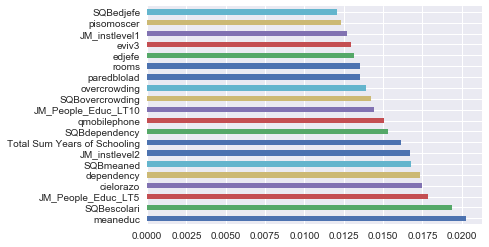

In [38]:
#To Use Linear SVM, we need to reduce the number of features. Using feature selection.


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=147,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_





In [29]:

#SVM

from sklearn import svm

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
X_train_sv = X_train[['meaneduc','JM_People_Educ_LT15','overcrowding','public']]
X_test_sv = X_test[['meaneduc','JM_People_Educ_LT15','overcrowding','public']]
scl_obj.fit(X_train_sv)

X_train_scaled = scl_obj.transform(X_train_sv)
X_test_scaled = scl_obj.transform(X_test_sv) 
svm_clf = svm.SVC(gamma='auto', C=100, kernel='linear')
svm_clf.fit(X_train_scaled, y_train)  

y_hat2 = svm_clf.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,y_hat2)
conf = mt.confusion_matrix(y_test,y_hat2)

print("accuracy", acc )
print("confusion matrix\n",conf)


accuracy 0.645378151261
confusion matrix
 [[  0   0   0  43]
 [  0   0   0  91]
 [  0   0   0  77]
 [  0   0   0 384]]


In [24]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

rf_clf.fit(X_train, y_train)


y_hat3 = rf_clf.predict(X_test)

acc = mt.accuracy_score(y_test,y_hat3)
conf = mt.confusion_matrix(y_test,y_hat3)

print("accuracy", acc )
print("confusion matrix\n",conf)

accuracy 0.690756302521
confusion matrix
 [[  7  13   1  22]
 [  5  28   5  53]
 [  1   9   7  60]
 [  1   9   5 369]]


# Model Advantages

Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

# Interpret Feature Importance

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?


In [25]:
#Logistic Regression Feature Importance
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train2)

X_train_scaled = scl_obj.transform(X_train2)
X_test_scaled = scl_obj.transform(X_test2) 

lr_clf = LogisticRegression(C=1,  class_weight=None)
lr_clf.fit(X_train_scaled,y_train)

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

#coeff = lr_clf.coef_

for num in range(4):
    zip_vars = zip(lr_clf.coef_[num].T,X_train2.columns) # combine attributes
    zip_vars = sorted(zip_vars)
    #print(zip_vars)
    for coef, name in zip_vars:
        print("model",num+1,"variable",name, 'has weight of', coef)
#print(zip_vars)
#print(coef)
#wtf - can't figure out how to sort this.  following example and it blows up. 
#zip_vars = sorted(zip_vars)

#for coef, name in zip_vars:
 #     for cnt in range(4):
  #      print(name, 'has weight of', coef[cnt])



accuracy: 0.694117647059
[[ 10  16   0  17]
 [  8  26   5  52]
 [  5   6   7  59]
 [  4   7   3 370]]
model 1 variable SQBovercrowding has weight of -0.516961600057
model 1 variable qmobilephone has weight of -0.51021643553
model 1 variable meaneduc has weight of -0.50259009367
model 1 variable hogar_adul has weight of -0.461344682039
model 1 variable SQBescolari has weight of -0.360123154267
model 1 variable hhsize has weight of -0.359647072574
model 1 variable hogar_total has weight of -0.359647072574
model 1 variable Total Sum Years of Schooling has weight of -0.347020871563
model 1 variable dependency has weight of -0.345958680383
model 1 variable JM_instlevel9 has weight of -0.275837076378
model 1 variable JM_parentesco4 has weight of -0.24718943675
model 1 variable JM_estadocivil6 has weight of -0.210927342184
model 1 variable tipovivi3 has weight of -0.163208457232
model 1 variable JM_parentesco6 has weight of -0.16230468719
model 1 variable cielorazo has weight of -0.1597279599

model 3 variable JM_Sum_Of_Males has weight of 0.0414171147411
model 3 variable JM_estadocivil4 has weight of 0.0487994535708
model 3 variable JM_1YrBehindSchool has weight of 0.052261264242
model 3 variable tipovivi1 has weight of 0.0535517244988
model 3 variable epared2 has weight of 0.0558013676133
model 3 variable JM_parentesco3 has weight of 0.0559686532275
model 3 variable tipovivi4 has weight of 0.057187017136
model 3 variable energcocinar1 has weight of 0.0605979516177
model 3 variable JM_parentesco9 has weight of 0.0614722033131
model 3 variable pisomadera has weight of 0.0652082223916
model 3 variable sanitario5 has weight of 0.0683498839467
model 3 variable JM_estadocivil5 has weight of 0.0711306550876
model 3 variable JM_instlevel6 has weight of 0.0792218267601
model 3 variable JM_3YrBehindSchool has weight of 0.0799269903717
model 3 variable JM_parentesco4 has weight of 0.0833652027645
model 3 variable JM_instlevel2 has weight of 0.0927636712563
model 3 variable JM_parente

In the Scikit learn logistic regression, the default setting is one vs. all methdology for a multi-class dependent variable. In our case, we have 4 different classes 1,2,3,and 4 where 1 is extreme poverty and 4 non-vulnerable households. Some variables are dropped from the model because of redundancy and/or contribution to the total variation is small. After adjusting for the variation in each of the explanatory variables, importance can now be interpreted. 
When looking at the first model, extreme poverty vs. all, we can see that overcrowding square, qmobilephone, and mean education are high importance on the negative end. On the positive end, people with education less than 15 years, public electricity, and overcrowding are high importance.In the case of extreme poverty, overcrowding and education seem to be overarching theme of extreme poverty. Increase in mean education and number of mobile phones indicates a lower likelihood of not being in poverty, where we can say number of mobile phones is proxy for income of the household. Increase in the number of people with less than 15 years of education, use of public electricity, and overcrowding indicates a higher likelihood of being in extreme poverty, where public electricity could be a proxy for income of the household also.
When looking at the second model, moderate poverty vs. all, we can see that on the negative end number of adults in the household, education of the male head of household squared, and number of post-graduates or higher are of high importance. This seems to be indicate that higher number of adults, education of the male of household squares, and post graduate degrees decreases the likelihood of being in moderate poverty. On the postive end, we can see people with education less than 15 years, education of the male head of household, and overcrowding square are of high importance. We see the same variable overcrowding and people with education less than 15 years, that increases in these variable will increase the likehood of being in moderate poverty. The square of overcrowding could indicate a quadratic relationship indicating a minimum of overcrowding can increase the liklihood of moderate poverty.
When looking at the third model,vulnerable household vs. all, number of children between 0 to 19 squared, number of adults in the household, and post graduate degrees are of high importance on the negative end. The reoccurring theme of higher education lowers the likelihood of being in a vulnerable household is present. It seems to also shows that there could be a maximum of number of children which could decrease the likelihood of being in a vulnerable household. Also having more adults in the household decreases the likelihood of being in vulnerable household since this could be a proxy for more income. On the positive end, people with education less than 15 years, use of electricity from cooperative, and use of public electricity are of high importance. It seems to show that having less than 15 years of education significantly increases your likelihood of being in a vulnerable household. Also what kind of electricity you can afford, public and cooperative, is a proxy of income and so using these types of electricity means lower income which mean higher likelihood of being in a vulnerable household.
When looking at the fourth model, non-vulnerable households vs all, we can see that people with education less than 15 years, use of electricity from cooperative, and use of public electricity are of high importance. This is the exact oppositive of the vulnerable household. If the household has any of these indicators then they have a lower likelihood of being a non-vulnerable household. On the positive end, number of adults in the household, number of postgraudate degrees, and number of individuals in the household indicate a higher likelihood of being in a non-vulnerable household. This is intuitive because the more adults could mean more income, having a postgraduate degree means a higher paying job, and more individuals in the household means the household is able to afford the high cost that comes with large households.
Some variables are more important than others because of how prevalent the characteristic is for the given level. We can see that overcrowding is prevelant in the extreme and moderate poverty levels but not in the vulnerable and non-vulnerable levels. This indicates there are more people with type of characteristic at those poverty levels. However, there is an overarching theme that education is good indicator for poverty levels. In that each poverty level has some type of education variable. This seems to show that there is a certain threshold of education that can determine what is the likelihood of a given poverty level. 

# Interpret Support Vectors

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.



In [30]:
print(svm_clf.coef_)

[[  1.63863351e-05  -2.62645926e-05   1.06713251e-05   1.13686838e-13]
 [ -1.07474820e-04  -8.84919327e-05   4.24192167e-05  -6.30775168e-05]
 [ -8.42769150e-05  -1.08202021e-05   9.19651065e-05   6.82121026e-13]
 [  3.77613233e-05  -1.90598940e-04   4.70994883e-05  -3.18650997e-05]
 [ -1.87233854e-04   9.13600343e-06   1.50200191e-04   9.49610376e-06]
 [  1.78880564e-05   3.98616885e-05  -4.97371839e-05   3.97903932e-12]]
